<a href="https://colab.research.google.com/github/RbsFaneva/ML_exam_2025_ESIIA_5/blob/main/poketrafinday/notebooks/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("=== ANALYSE EXPLORATOIRE ===")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print("\nPremières lignes du train set:")
print(train_df.head())

=== ANALYSE EXPLORATOIRE ===
Train shape: (30000, 7)
Test shape: (10000, 6)

Premières lignes du train set:
                         transaction_id  step      type  amount customer_id  \
0  38d8cd1a-ab64-48a8-982b-547db096f8a5   421   PAYMENT  311000   C13646530   
1  2440928e-8a4c-4e74-a9c5-6329668be13d   325   PAYMENT  399600    C9452763   
2  973c2a3c-5676-477c-ac30-81334b01e90d   565   PAYMENT    7500   C31260354   
3  5413d0f4-b4f0-406f-bd91-91de1dce573c   511  TRANSFER   94000    C8841991   
4  c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98    63  CASH_OUT   15000    C3176716   

   age  is_fraud  
0   24         0  
1   25         0  
2   38         0  
3   26         0  
4   26         0  


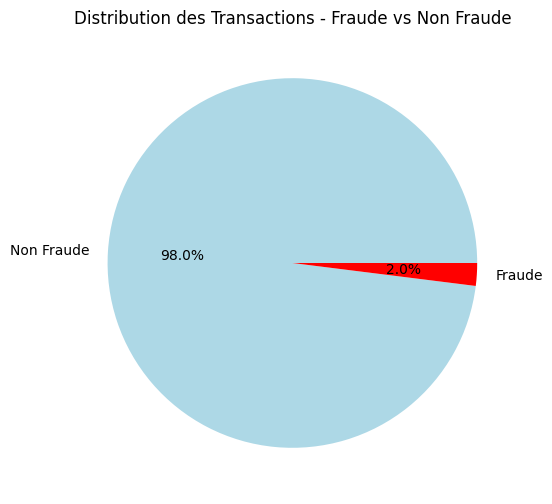

Nombre de fraudes: 595 (1.98%)
Déséquilibre important: Ratio de 49.4:1


In [2]:
# Distribution de la variable cible
plt.figure(figsize=(10, 6))
fraud_counts = train_df['is_fraud'].value_counts()
plt.pie(fraud_counts, labels=['Non Fraude', 'Fraude'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Distribution des Transactions - Fraude vs Non Fraude')
plt.show()

print(f"Nombre de fraudes: {fraud_counts[1]} ({fraud_counts[1]/len(train_df)*100:.2f}%)")
print(f"Déséquilibre important: Ratio de {fraud_counts[0]/fraud_counts[1]:.1f}:1")

In [3]:
# Analyse des données manquantes
print("\n=== DONNÉES MANQUANTES ===")
missing_data = train_df.isnull().sum()
print(missing_data[missing_data > 0])

# Types de données
print("\n=== TYPES DE DONNÉES ===")
print(train_df.dtypes)


=== DONNÉES MANQUANTES ===
Series([], dtype: int64)

=== TYPES DE DONNÉES ===
transaction_id    object
step               int64
type              object
amount             int64
customer_id       object
age                int64
is_fraud           int64
dtype: object


In [5]:
# Variables catégorielles
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\n=== VARIABLES CATÉGORIELLES ===")
for col in categorical_cols:
    if col in train_df.columns:
        print(f"\n{col}:")
        print(train_df[col].value_counts())


=== VARIABLES CATÉGORIELLES ===

transaction_id:
transaction_id
6685f5ba-f030-4058-9e26-0aa4391b401e    1
7ec98f68-69c5-439d-a8fa-7860addc8246    1
48dbfd77-ae7a-4c2d-832f-cb843502a6db    1
ae0c7a3b-b5da-493c-93de-446d5489477a    1
e911b73c-68cb-485d-9250-a9292f907225    1
                                       ..
c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98    1
5413d0f4-b4f0-406f-bd91-91de1dce573c    1
973c2a3c-5676-477c-ac30-81334b01e90d    1
2440928e-8a4c-4e74-a9c5-6329668be13d    1
38d8cd1a-ab64-48a8-982b-547db096f8a5    1
Name: count, Length: 30000, dtype: int64

type:
type
PAYMENT     11150
TRANSFER     8160
CASH_OUT     7716
DEBIT        2974
Name: count, dtype: int64

customer_id:
customer_id
C9773232     2
C80242429    2
C91543472    2
C88129179    1
C66752963    1
            ..
C43802021    1
C13650056    1
C65308368    1
C36342391    1
C29368673    1
Name: count, Length: 29997, dtype: int64
